# Research Methods 
## 2012 Olympics Hypothesis Testing

Fabian Karl & Robert Brown
due: 04. December 2017

task: construct a hypotheses regarding the success of an Olympic team and test this using the data

In [46]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

pd.options.display.max_columns = 2000
%matplotlib inline

In [2]:
df = pd.read_csv('london-2012.csv', thousands=',')
df.head(10)

,ISO,GDP.2011,pop.2010,Country name,NOC,F.2012,M.2012,NOC SIZE,NOC.Size.Per.100K.pop,Gold,Silver,Bronze,Total,Bronze.Per.100K.pop,Silver.Per.100K.pop,Gold.Per.100K.pop,Total.Per.100K.pop,Bronze.Per.1BN.GDP,Silver.Per.1BN.GDP,Gold.Per.1BN.GDP,Total.Per.1BN.GDP,Bronze.Per.Athlete,Silver.Per.Athlete,Gold.Per.Athlete,Total.Per.Athlete,Bronze.pop,Silver.pop,Gold.pop,Total.pop,Bronze.GDP,Silver.GDP,Gold.GDP,Total.GDP,Bronze.Athlete,Silver.Athlete,Gold.Athlete,Total.Athlete,GDP rank score,Population rank score,Athlete rank score,Official medal ranking,GDP rank,Pop rank,Team size rank,Unnamed: 44,"Total medal score (gold=3, silver =2, bronze=1)",Model-based score,Model-based rank
0,AFG,2.034346e+10,34385000,Afghanistan,AFG,1,5,6,0.017449,0,0,1,1,0.002908,0.000000,0.000000,0.002908,0.049156,0.000000,0.000000,0.049156,0.166667,0.000000,0.000000,0.166667,0.4,0.0,0.0,0.4,5.53,0.00,0.00,5.53,17.72,0.00,0.00,17.72,5.53,0.4,17.72,79,45,82,39,NaN,1,-0.725821,107
1,ALB,1.295956e+10,3205000,Albania,ALB,4,7,11,0.343214,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,86,86,85,86,NaN,0,-1.173997,125
2,DZA,1.886810e+11,35468000,Algeria,ALG,18,21,39,0.109958,1,0,0,1,0.000000,0.000000,0.002819,0.002819,0.000000,0.000000,0.005300,0.005300,0.000000,0.000000,0.025641,0.025641,0.0,0.0,0.3,0.3,0.00,0.00,0.54,0.54,0.00,0.00,4.23,4.23,1.62,0.9,12.69,58,68,78,58,NaN,3,-5.829173,169
3,ASM,5.370000e+08,68420,American Samoa,ASA,1,4,5,7.307805,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,86,86,85,86,NaN,0,-0.104260,56
4,AND,3.491000e+09,84864,Andorra,AND,2,4,6,7.070136,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,86,86,85,86,NaN,0,-0.412898,90
5,AGO,1.009900e+11,19082000,Angola,ANG,30,5,35,0.183419,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,86,86,85,86,NaN,0,-5.505927,167
6,ATG,1.128709e+09,88000,Antigua and Barbuda,ANT,2,3,5,5.681818,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,86,86,85,86,NaN,0,-0.180710,67
7,ARG,4.459890e+11,40412000,Argentina,ARG,43,99,142,0.351381,1,1,2,4,0.004949,0.002475,0.002475,0.009898,0.004484,0.002242,0.002242,0.008969,0.014085,0.007042,0.007042,0.028169,0.7,0.4,0.3,1.4,0.50,0.34,0.23,1.07,1.50,0.91,1.16,3.57,1.87,2.4,6.80,43,64,65,76,NaN,7,-9.630904,184
8,ARM,1.024779e+10,3092000,Armenia,ARM,4,21,25,0.808538,0,1,2,3,0.064683,0.032342,0.000000,0.097025,0.195164,0.097582,0.000000,0.292746,0.080000,0.040000,0.000000,0.120000,9.3,5.3,0.0,14.6,21.94,14.64,0.00,36.58,8.50,5.17,0.00,13.67,51.22,19.9,18.84,53,8,29,37,NaN,4,3.012326,30
9,ABW,2.456000e+09,108000,Aruba,ARU,1,3,4,3.703704,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,86,86,85,86,NaN,0,-0.320914,82


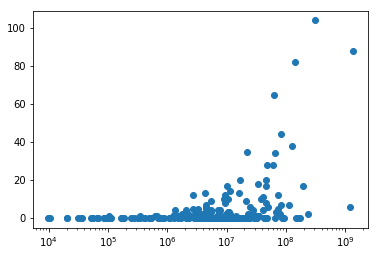

In [13]:
fig, ax = plt.subplots()
ax.scatter(df['pop.2010'], df['Total'])
ax.set_xscale('log')

In [6]:
df[df['pop.2010'] > 1.2e9]

,ISO,GDP.2011,pop.2010,Country name,NOC,F.2012,M.2012,NOC SIZE,NOC.Size.Per.100K.pop,Gold,Silver,Bronze,Total,Bronze.Per.100K.pop,Silver.Per.100K.pop,Gold.Per.100K.pop,Total.Per.100K.pop,Bronze.Per.1BN.GDP,Silver.Per.1BN.GDP,Gold.Per.1BN.GDP,Total.Per.1BN.GDP,Bronze.Per.Athlete,Silver.Per.Athlete,Gold.Per.Athlete,Total.Per.Athlete,Bronze.pop,Silver.pop,Gold.pop,Total.pop,Bronze.GDP,Silver.GDP,Gold.GDP,Total.GDP,Bronze.Athlete,Silver.Athlete,Gold.Athlete,Total.Athlete,GDP rank score,Population rank score,Athlete rank score,Official medal ranking,GDP rank,Pop rank,Team size rank,Unnamed: 44,"Total medal score (gold=3, silver =2, bronze=1)",Model-based score,Model-based rank
41,CHN,7.298100e+12,1338300000,China,CHN,208,163,371,0.027722,38,27,23,88,0.001719,0.002017,0.002839,0.006576,0.003152,0.003700,0.005207,0.012058,0.061995,0.072776,0.102426,0.237197,0.2,0.3,0.3,0.8,0.35,0.55,0.53,1.43,6.59,9.40,16.9,32.89,3.04,1.7,76.09,2,54,73,1,NaN,191,50.244145,3
84,IND,1.847980e+12,1224615000,India,IND,23,60,83,0.006778,0,2,4,6,0.000327,0.000163,0.000000,0.000490,0.002165,0.001082,0.000000,0.003247,0.048193,0.024096,0.000000,0.072289,0.0,0.0,0.0,0.0,0.24,0.16,0.00,0.40,5.12,3.11,0.0,8.23,0.56,0.0,11.34,41,81,85,61,NaN,8,-42.990935,203


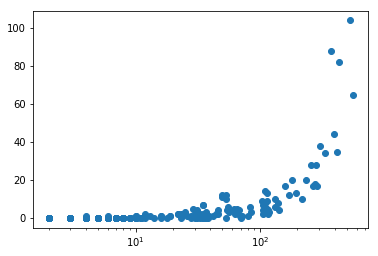

In [45]:
fig, ax = plt.subplots()
ax.scatter(df['NOC SIZE'], df['Total'])
ax.set_xscale('log')

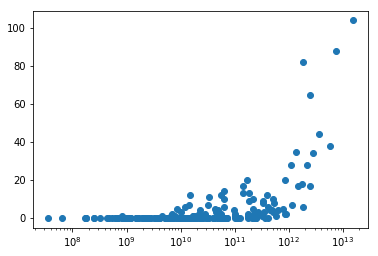

In [22]:
fig, ax = plt.subplots()
ax.scatter(df['GDP.2011'], df['Total'])
ax.set_xscale('log')

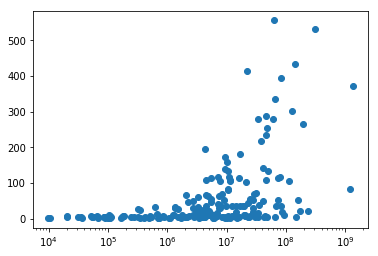

In [44]:
fig, ax = plt.subplots()
ax.scatter(df['pop.2010'], df['NOC SIZE'])
ax.set_xscale('log')

In [49]:
stats.ttest_1samp(df['pop.2010'], 33778365.117647059)  

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

In [48]:
np.mean(df['pop.2010'])

33778365.117647059